In [145]:
#%% Modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import the chaosmagpy module
from chaosmagpy.model_utils import design_gauss, synth_values

Load SWARM datasættet SWARM.txt og plot 𝐵_𝜃, 𝐵_𝜑 og 𝐵_𝑟 som funktion af θ

In [146]:
# load SWARM data with pandas
swarm = pd.read_csv("SWARM_data.csv")
swarm.columns = ['theta', 'phi', 'radius', 'Bt', 'Bp', 'Br']

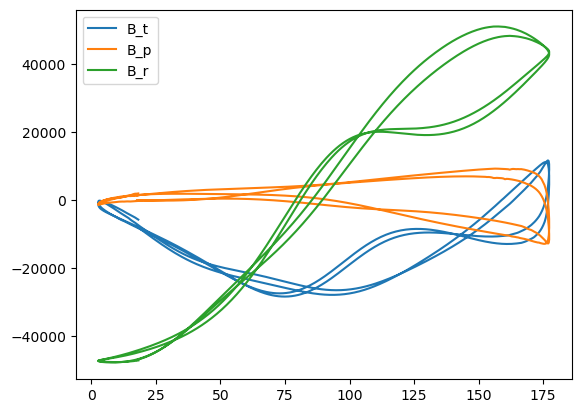

In [147]:
plt.plot(swarm.theta, swarm.Bt)
plt.plot(swarm.theta, swarm.Bp)
plt.plot(swarm.theta, swarm.Br)
plt.legend(["B_t", "B_p", "B_r"])

Udled det analytiske udtryk for dipol-modellen for hver af magnetfeltets tre komponenter 
𝐵𝜃, 𝐵𝜑og 𝐵𝑟 (Hint: Sfæriske koordinater). Derefter evaluér udtrykkene for 𝑔10=-29404.8 nT, 
𝑔11=-1450.9 nT og ℎ11=4652.5 i koordinaterne fra SWARM datasættet og plot resultatet 
som funktion af θ.

Text(0.5, 0, 'theta')

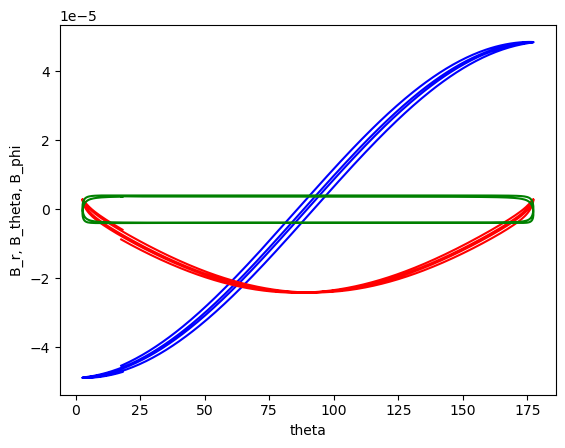

In [148]:
k = np.pi/180

g_10 = -29404.8*10**(-9) #nT convertert til tesla(T)
g_11 = -1450.9*10**(-9) #nT convertert til tesla(T)
h_11 = 4652.5*10**(-9) #nT convertert til tesla(T)
R = 6371000 #m

B_radius = 2*R**3/(swarm.radius**3)*(g_10*np.cos(swarm.theta*k)+(g_11*np.cos(swarm.phi*k)+h_11*np.sin(swarm.phi*k))*np.sin(swarm.theta*k))

B_theta = -R**3/(swarm.radius**3)*(-g_10*np.sin(swarm.theta*k)+(g_11*np.cos(swarm.phi*k)+h_11*np.sin(swarm.phi*k))*np.cos(swarm.theta*k))

B_phi =-R**3/(swarm.radius**3)*(-g_11*np.sin(swarm.phi*k)+h_11*np.cos(swarm.phi*k))

plt.figure()
plt.plot(swarm.theta,B_radius, color = "blue")
plt.plot(swarm.theta,B_theta, color = "red")
plt.plot(swarm.theta,B_phi, color = "green")

plt.ylabel('B_r, B_theta, B_phi')
plt.xlabel('theta')

Load Gauss–koefficienter fra IGRF og brug Python funktionen design_gauss.py til at evaluere
IGRF modellen i koordinaterne fra SWARM datasættet og plot resultat

In [149]:
# load IGRF model parameters
m = np.loadtxt('IGRF13-2020.txt')

In [150]:
from IGRF_modelling import design_gauss

In [151]:
A_radius, A_theta, A_phi = design_gauss(swarm.radius/1000, swarm.theta, swarm.phi, nmax=13)

In [152]:
np.size(A_radius)

218400

In [153]:
np.size(m)

195

In [154]:
B_r = A_radius @ m
B_t = A_theta @ m
B_p = A_phi @ m

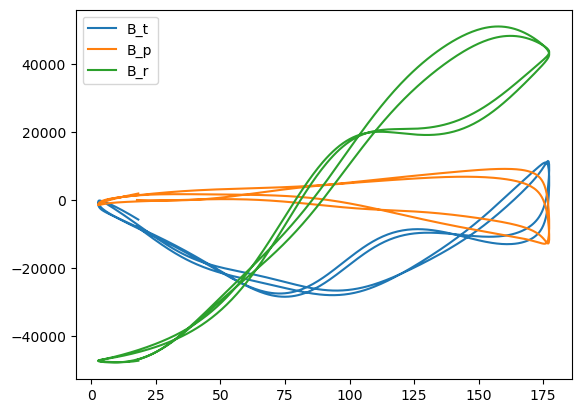

In [155]:
plt.plot(swarm.theta, B_t)
plt.plot(swarm.theta, B_p)
plt.plot(swarm.theta, B_r)
plt.legend(["B_t", "B_p", "B_r"])

Evaluer IGRF i disse lokationer: (1) Toppen af Canada, (2) Midt i New York City, (3) Ved
ækvator i Colombia, (4) Midt i Argentina og (5) midten af Antarkti

In [157]:
90-40.781403420352184

49.218596579647816

In [158]:
loc_theta = [7.486745234308799, 49.218596579647816, 90, 35.12, 180]
loc_phi = [-62.747510121234285, -73.96656703768694, -75.15, -65.06, 0]
locs = ["canada", "new york city", "columbia", "argentina", "antarctica"]

In [159]:
A2_radius, A2_theta, A2_phi = design_gauss(6371, loc_theta, loc_phi, nmax=13)

c:\Users\45407\Desktop\GeoAssignment\IGRF_modelling.py:153: UserWarning: Input coordinates include the poles.
  warnings.warn('Input coordinates include the poles.')


In [160]:
b2_radius = A2_radius @ m
b2_theta = A2_theta @ m
b2_phi = A2_phi @ m

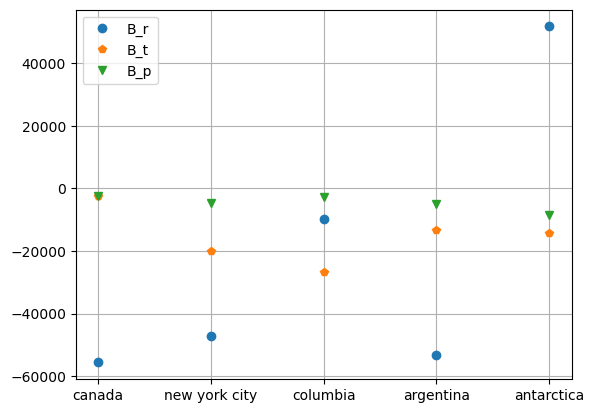

In [161]:
plt.plot(locs, b2_radius, marker = "o", linestyle = "none")
plt.plot(locs, b2_theta, marker = 'p', linestyle = "none")
plt.plot(locs, b2_phi, marker = "v", linestyle = "none")
plt.grid()
plt.legend(["B_r", "B_t", "B_p"])

Sammenlign dipol-modellens og IGRF-modellens evne til at forudse SWARM datasættet 
– både visuelt og statistisk (vha. R i anden (R^2) analyse). Hvordan er dipol modellen forskellig fra IGRF modellen. Hvor mange procent af variansen i SWARM dataet beskriver 
IGRF og dipol modellen. Beskriv hvad der sker når man øger n og m i Ligning 1.1?

In [162]:
def squareDiffSum(y1, y2):
    return float(np.sum((y1-y2)**2)/len(y1))


def R_squared(y1, y2):
    mean = float(np.mean(y1))

    SSres = float(squareDiffSum(y1,y2))
    SStot = float(np.sum((y1-mean)**2)/len(y1))

    return 1 - SSres/SStot

IGRF vs Swarm

In [169]:
B_t = np.array(B_t)
B_p = np.array(B_p)
B_r = np.array(B_r)
SB_t = np.array(swarm.Bt)
SB_r = np.array(swarm.Br)
SB_p = np.array(swarm.Bp)

In [171]:
print(R_squared(SB_t, B_t), R_squared(SB_r, B_r),R_squared(SB_p, B_p))

0.9999724197457532 0.9999958998238621 0.9997899871356717


Text(0.5, 0, 'SWARM datapoints')

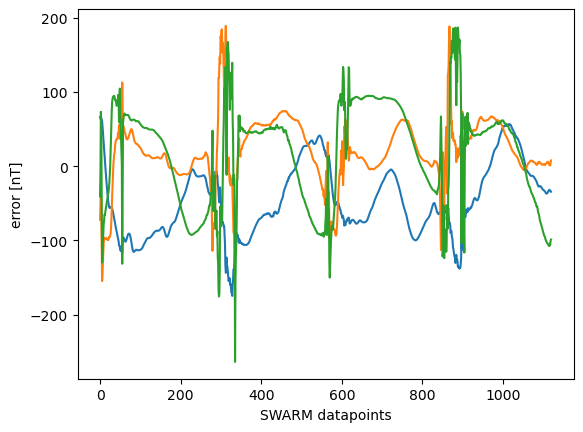

In [172]:
Br_error = swarm.Br - B_r
Bt_error = swarm.Bt - B_t
Bp_error = swarm.Bp - B_p

plt.figure()
plt.plot(Br_error)
plt.plot(Bt_error)
plt.plot(Bp_error)
plt.ylabel('error [nT]')
plt.xlabel('SWARM datapoints')

Dipole vs Swarm

In [165]:
B_theta = np.array(B_theta)*1E9
B_radius = np.array(B_radius)*1E9
B_phi = np.array(B_phi)*1E9

In [168]:
print(R_squared(SB_t, B_theta), R_squared(SB_r, B_radius),R_squared(SB_p, B_phi))

0.759915356186039 0.9594098449166693 0.43668378597436697


Text(0.5, 0, 'SWARM datapoints')

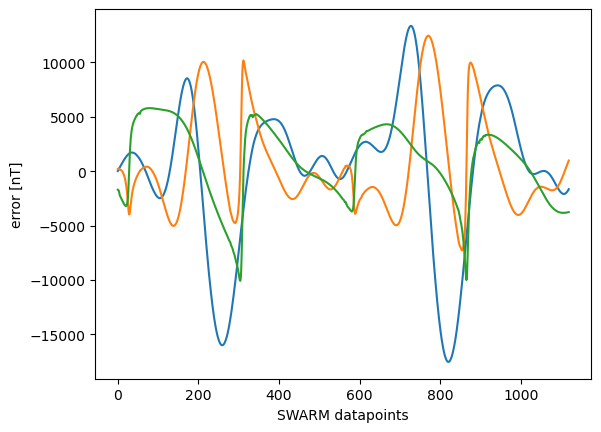

In [173]:
Br_error = swarm.Br - B_radius
Bt_error = swarm.Bt - B_theta
Bp_error = swarm.Bp - B_phi

plt.figure()
plt.plot(Br_error)
plt.plot(Bt_error)
plt.plot(Bp_error)
plt.ylabel('error [nT]')
plt.xlabel('SWARM datapoints')